# Getting started with DIPY

After its installation, DIPY can be imported using the following command line:

In [1]:
import dipy

### Loading data or defining data paths

In this tutorial, we will start by loading some diffusion MRI (dMRI) data using the function "get_fname" available in dipy.data. This function was designed for downloading publicly available dataset that are used for the different tutorials available in [dipy.org/tutorials/](https://dipy.org/tutorials/) This sample dataset allows also users interested in understanding diffusion MRI but haven't acquired their own datasets. In this notebook, we download a dataset which was kindly provided by Hansen and Jespersen*.

The total size of the downloaded data is 192 MBytes, however you only need to download this dataset once - the next time to run this tutorial the "get_fname" function will only retrieve the paths of the downloaded data.

*below we will plot the diffusion acquisition parameters for this dataset. However, full details about the downloaded data are reported on the following paper [Hansen2016](https://www.nature.com/articles/sdata201672).

In [2]:
from dipy.data import get_fnames
fraw, fbval, fbvec, t1_fname = get_fnames('cfin_multib')

The downloaded data basically contains four types of files: 1) a NIFTI file containing the diffusion weighted data; 2) a text files containing the b-values; 3) a text file containing the diffusion gradient directions (typically also referred to as b-vectors); 4) a NIFTI file containing a T1-weighted structural image.

Bellow we plot the directories of the dMRI data files:

In [3]:
print(fraw)
print(fbval)
print(fbvec)

C:\Users\rafae\.dipy\cfin_multib\__DTI_AX_ep2d_2_5_iso_33d_20141015095334_4.nii
C:\Users\rafae\.dipy\cfin_multib\__DTI_AX_ep2d_2_5_iso_33d_20141015095334_4.bval
C:\Users\rafae\.dipy\cfin_multib\__DTI_AX_ep2d_2_5_iso_33d_20141015095334_4.bvec


If you want to rerun this tutorial for data that you have acquired, you can manually define the variables fraw, fbval and fbvec with your data directories.

**Note:** Dipy handles dMRI data in the NIFTI format; however, current clinical scanners typically provide data in the DICOM format. If your data is in DICOM format, you need to convert your data to NIFTI first. For this you can tools available by other packages such as provided by: [dicom2nifti](https://pypi.org/project/dicom2nifti/)

### Reading data

Now that we retrieved the dMRI data path, we can read it using the functions in dipy.io.

1) To read the dMRI data we use Dipy's function "load_nifti"

In [4]:
from dipy.io.image import load_nifti

data, affine = load_nifti(fraw)

2) To read the b-values and b-vectors we use Dipy's function "read_bvals_bvecs"

In [5]:
from dipy.io.gradients import read_bvals_bvecs

bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

To have a sense of the raw dMRI data let's inspect the format of the variable data:

In [6]:
print("The shape of variable data is {}".format(data.shape))

The shape of variable data is (96, 96, 19, 496)


One can note that dMRI data typically corresponds to a 4D matrix. Its first three dimensions corresponds to the coordinates of the image voxels, while the last coordinate correspond to the number of diffusion-weighted experiments. In this case, dMRI data was acquired for 496 experiments. 

Let's use matplotlib to visualize the middle axial slice of the 158th dMRI experiment.

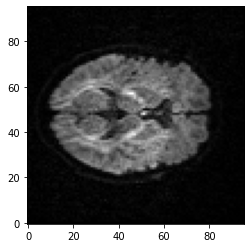

In [7]:
import matplotlib.pyplot as plt

mid_sli = 9
exp_ind = 157
# Python indexing starts from 0 so the 158th experiment corresponds to index 157

plt.imshow(data[:, :, mid_sli, exp_ind], cmap='gray', origin='lower')

The variable bvals contains the b-values of each dMRI experiments, and thus, its length corresponds to the the last dimension of the dMRI data.

In [8]:
print("The shape of variable bvals is {}".format(bvals.shape))

The shape of variable bvals is (496,)


Regarding the variable bvecs, this is a 496 $\times$ 3 matrix corresponding to the 3 coordinates of the gradient directions of all 496 experiments: 

In [9]:
print("The shape of variable bvecs is {}".format(bvecs.shape))

The shape of variable bvecs is (496, 3)


Below we print the b-value and diffusion gradient direction used for the 158th dMRI experiment

In [10]:
print("158th experiment was acquired with b-value={} s/mm^2".format(bvals[exp_ind]))
print("158th experiment was acquired with b-vector={}".format(bvecs[exp_ind, :]))

158th experiment was acquired with b-value=1000.0 s/mm^2
158th experiment was acquired with b-vector=[ 0.999054  -0.037643  -0.0217622]


### Creating the GradientTable Object

In DIPY, we use an object called "GradientTable" to summarize the diffusion acquisition parameters (b-values, b-vectors, and other parameters if specified) and perform some optional operations.

This "GradientTable" Object can be generated from the variables bvals and bvecs from tools available from "dipy.core.gradients":

In [11]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

The "gtab" object can be useful to quickly inspect information about the acquisition parameters. For example, the object attribute "b0s_mask" retrieves a boolean array in which elements with True value indicates the experiments acquired by b-value=0.

In [12]:
print(gtab.b0s_mask)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

The b-values and b-vectors are also stored in the attributes gtab.bvals and gtab.bvecs respectively.

Bellow we plot again the b-value and b-vector of the 158th experiment using the "gtab" attributes

In [13]:
print("158th experiment was acquired with b-value={} s/mm^2".format(gtab.bvals[exp_ind]))
print("158th experiment was acquired with b-vector={}".format(gtab.bvecs[exp_ind, :]))

158th experiment was acquired with b-value=1000.0 s/mm^2
158th experiment was acquired with b-vector=[ 0.999054  -0.037643  -0.0217622]


### Exercise 1

Now that we are familiarized with the dMRI data format, let’s do the following exercise:

1.1) Use gtab.b0s_mask to select the dMRI data acquired with b-value=0.

1.2) Plot the middle slice of the selected data, together with the middle slices of the data acquired of experiments 154, 158, 484, 488. You can use “matplotlib.pyplot” subplots (If you are not familiarized with matplotlib plotting tools, to resolve this exercise you can try adapting the figure plotting on the following [dipy tutorial](https://dipy.org/documentation/1.3.0./examples_built/quick_start/#example-quick-start)).

1.3) Print the b-values and b-vectors of experiments 154, 158, 484, 488.

In [14]:
import numpy as np

# Select data acquired with b-value = 0
# (Add your code here)

# Plot middle slice data
# (Add your code here)

# print b-values and b-vectors
# (Add your code here)


### Exercise 2

Raw dMRI images do not only depend on the tissue diffusion properties but also on tissue relaxation times ($S=S_0 exp(-bD_{app})$). To remove the effect of relaxation times you can divide the dMRI experiment by the data acquired for b-value=0. Alternatively, to remove the effects of the relaxation times, you can calculate the apparent diffusion coefficient for each experiment using the following formula:

$$D_{app} = -\frac{1}{b}\log{(\frac{S}{S_0})} $$

For this exercise, let's:

2.1) compute the apparent diffusivities for all the 496 dMRI experiments (note logarithms of matrices can be computed using "np.log" function after importing "numpy" as "np").

2.2) plot the apparent diffusivities for experiments 154, 158, 484, 488. Given that the diffusion in tissue cannot be larger than the diffusion of free water, use the optional inputs vmin and vmax of “matplotlib.pyplot.imshow” function to plot the data between 0 and 3e-3 $mm^2/s$.

*Note: The calculation of $D_{app}$ involves the division of S0 signals. In voxels of the background, the disivion of S0=0 values will generate infinite values. For plotting proposes, you might want to remove the background voxels by setting all values out of a brain mask to zero. A simple brain mask can be computed using the "median_otsu" function from “dipy.segment.mask”  

In [15]:
from dipy.segment.mask import median_otsu

maskdata, mask = median_otsu(data, vol_idx=range(10, 50), median_radius=3,
                             numpass=1)

In [16]:
import numpy as np

# Add your code here